<a href="https://colab.research.google.com/github/IqbalLx/Egg-producing-chicken-analysis/blob/master/Egg_Producing_Chicken_EDA%2C_Visualize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparing the Dataset

This chicken farm dataset is retrive from kaggle

In [0]:
!pip install -q kaggle

In [0]:
!mkdir ~/.kaggle

In [0]:
from google.colab import files
files.upload() #kaggle.json

In [0]:
!cp kaggle.json ~/.kaggle

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d phuzoman/egg-producing-chickens

  0% 0.00/5.90k [00:00<?, ?B/s]
100% 5.90k/5.90k [00:00<00:00, 12.4MB/s]


In [0]:
import zipfile

zip_ref = zipfile.ZipFile('egg-producing-chickens.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('GallusGallusDomesticus.csv')
df.sample(10)

,GallusID,GallusBreed,Day,Age,GallusWeight,GallusEggColor,GallusEggWeight,AmountOfFeed,EggsPerDay,GallusCombType,SunLightExposure,GallusClass,GallusLegShanksColor,GallusBeakColor,GallusEarLobesColor,GallusPlumage
222,Marans45,Marans,3,863,2930,Brown,42.53,117,1,Single,10,Continental,White,White,NaN,Splash
129,Marans26,Marans,5,859,1890,Brown,53.83,121,1,Single,7,Continental,White,White,NaN,Blue
893,Marans179,Marans,4,844,2710,Brown,34.86,117,1,Single,8,Continental,White,White,NaN,Splash
988,Ameraucana10,Ameraucana,4,901,2100,Light Blue,52.24,109,1,Pea,7,NaN,Slate Blue,White,Red,Buff
262,Marans53,Marans,3,660,2640,Brown,39.02,124,1,Single,8,Continental,White,White,NaN,Blue Copper
507,Marans102,Marans,3,466,1840,Brown,49.79,122,1,Single,10,Continental,White,White,NaN,Splash Copper
209,Marans42,Marans,5,936,1530,Brown,39.71,113,1,Single,7,Continental,White,White,NaN,Blue Copper
351,Marans71,Marans,2,825,2690,Brown,54.30,123,1,Single,10,Continental,White,White,NaN,Blue
747,Marans150,Marans,3,976,1510,Brown,46.58,111,0,Single,8,Continental,White,White,NaN,Splash
543,Marans109,Marans,4,717,2650,Brown,35.25,128,1,Single,8,Continental,White,White,NaN,Splash Copper


# Explore Metadata of the Dataset

In [0]:
df.shape

(1000, 16)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GallusID              1000 non-null   object 
 1   GallusBreed           1000 non-null   object 
 2   Day                   1000 non-null   int64  
 3   Age                   1000 non-null   int64  
 4   GallusWeight          1000 non-null   int64  
 5   GallusEggColor        1000 non-null   object 
 6   GallusEggWeight       1000 non-null   float64
 7   AmountOfFeed          1000 non-null   int64  
 8   EggsPerDay            1000 non-null   int64  
 9   GallusCombType        1000 non-null   object 
 10  SunLightExposure      1000 non-null   int64  
 11  GallusClass           895 non-null    object 
 12  GallusLegShanksColor  970 non-null    object 
 13  GallusBeakColor       970 non-null    object 
 14  GallusEarLobesColor   85 non-null     object 
 15  GallusPlumage         

Here we have 5 numerical values, they are Day, Age, GallusWeight, AmountOfFeed, EggsPerDay and SunLightExposure

In [0]:
df.isna().sum()

GallusID                  0
GallusBreed               0
Day                       0
Age                       0
GallusWeight              0
GallusEggColor            0
GallusEggWeight           0
AmountOfFeed              0
EggsPerDay                0
GallusCombType            0
SunLightExposure          0
GallusClass             105
GallusLegShanksColor     30
GallusBeakColor          30
GallusEarLobesColor     915
GallusPlumage             0
dtype: int64

All null values is on categorical columns, and most of that columns is not relevant with the amount of egg that chicken can produce in a day

In [0]:
df.describe()

,Day,Age,GallusWeight,GallusEggWeight,AmountOfFeed,EggsPerDay,SunLightExposure
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.25000,522.010000,2217.850000,43.427100,116.250000,0.965000,8.300000
std,1.78625,284.765045,438.544409,7.510839,7.514917,0.183872,1.269493
min,1.00000,24.000000,1500.000000,30.080000,100.000000,0.000000,5.000000
25%,2.00000,246.500000,1840.000000,36.895000,110.000000,1.000000,7.000000
50%,3.00000,527.500000,2170.000000,43.775000,116.000000,1.000000,8.000000
75%,4.00000,796.000000,2640.000000,50.020000,123.000000,1.000000,9.000000
max,10.00000,990.000000,3000.000000,58.930000,129.000000,1.000000,11.000000


In [0]:
df.columns

Index(['GallusID', 'GallusBreed', 'Day', 'Age', 'GallusWeight',
       'GallusEggColor', 'GallusEggWeight', 'AmountOfFeed', 'EggsPerDay',
       'GallusCombType', 'SunLightExposure', 'GallusClass',
       'GallusLegShanksColor', 'GallusBeakColor', 'GallusEarLobesColor',
       'GallusPlumage'],
      dtype='object')

### Columns Info
1.   GallusBreed - breed of chicken such as ‘Buff Orpington chicken’
2.   Day - an integer indicating the day on which an observation was made
3.   Age - age of the chicken in weeks
4. GallusWeight - weight of the chicken in grams
5. GallusEggColor - color of the eggs
6. GallusEggWeight - weight of the eggs in grams
7. AmountOfFeed - amount of feed in grams the chicken consumed per day
8. EggsPerDay - number of eggs a chicken laid on a particular day
9. GallusCombType - comb type of a particular chicken
10. SunLightExposure - number of hours a chicken is exposed to natural light (sunlight) in a day
11. GallusClass - chicken classes as classified by international Poultry 12. associations
12. GallusLegShanksColor - color of the legs/feet and shanks on them
13. GallusBeakColor - color of the chicken’s beak
14. GallusEarLobesColor - color of the chicken earlobes
15. GallusPlumage - color of the feathers


# Exploratory Data Analysis

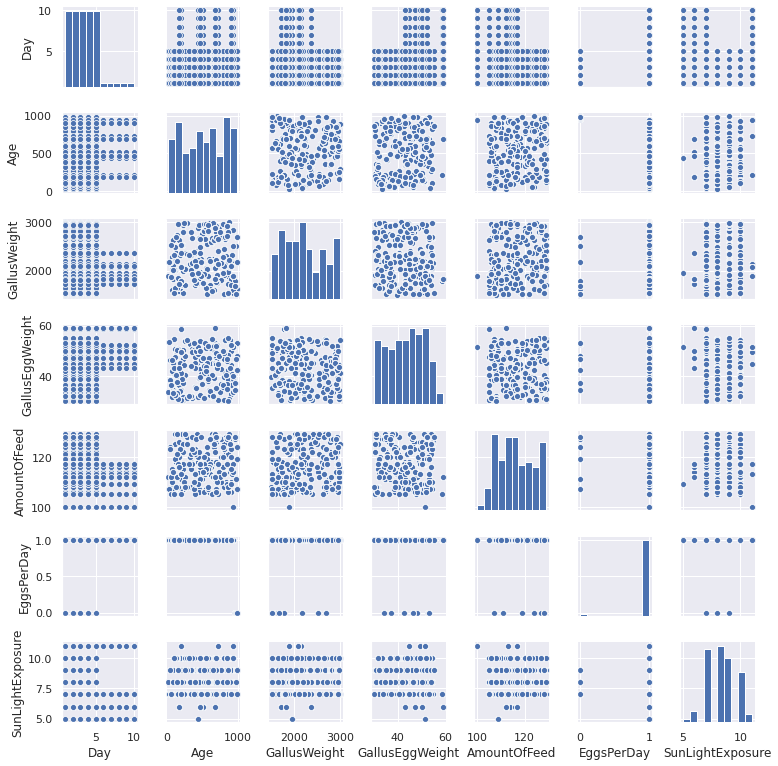

In [0]:
sns.pairplot(df, height=1.5)

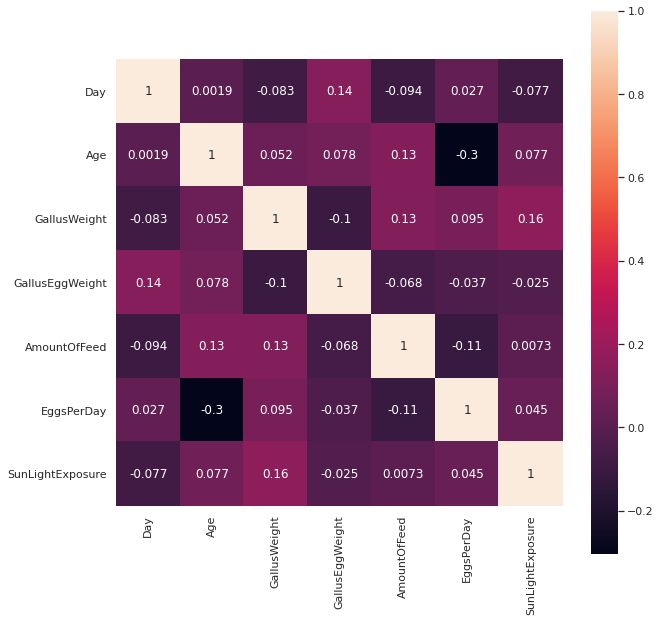

In [0]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, square=True)

In [0]:
df.corr()['EggsPerDay'].sort_values()

Age                -0.304632
AmountOfFeed       -0.109570
GallusEggWeight    -0.037039
Day                 0.026668
SunLightExposure    0.045028
GallusWeight        0.095273
EggsPerDay          1.000000
Name: EggsPerDay, dtype: float64

Several key takeaways:
1. Older the chicken, less egg its produce
2. Bigger the amount of food, lesser egg its produce why (?)
3. More the chicken exposed to the sun per day, more eggs its produce
4. Bigger chicken weight the more its egg (it's contadictive against point 2) why (?)

Lets take a look on Age columns and its correlation with EggsPerDay

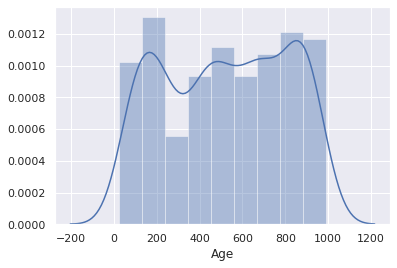

In [0]:
sns.distplot(df.Age)

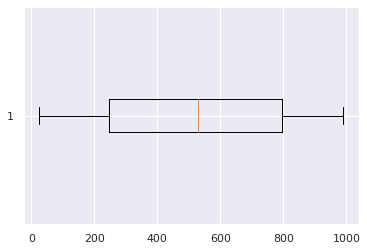

In [0]:
plt.boxplot(df.Age, vert=False)
plt.show()

In [0]:
df.Age.nunique()

167

In [0]:
df_age = df.groupby(['GallusBreed', 'Age']).agg({
    'EggsPerDay':'sum',
    'GallusID':'count'
}).reset_index()
df_age['EggLayingRatio'] = df_age['EggsPerDay'] / df_age['GallusID']
df_age.sample(10)

,GallusBreed,Age,EggsPerDay,GallusID,EggLayingRatio
80,Marans,469,5,5,1.0
90,Marans,554,5,5,1.0
42,Marans,193,5,5,1.0
51,Marans,250,5,5,1.0
5,Ameraucana,469,10,10,1.0
122,Marans,717,5,5,1.0
142,Marans,854,5,5,1.0
47,Marans,226,5,5,1.0
54,Marans,266,10,10,1.0
129,Marans,799,5,5,1.0


In [0]:
def plot_ratio(df, column, loc='lower left'):
  df = df.sort_values(by=column)
  x, y = df[column], df.EggLayingRatio
  poly = np.polyfit(x, y, 5)
  poly_y = np.poly1d(poly)(x)

  plt.plot(x, y, label='Real Value')
  plt.plot(x, poly_y, '--', label='Smoothen Value')
  plt.title(f'{column} vs Egg Laying Ratio')
  plt.legend(loc=loc)
  return plt.show()

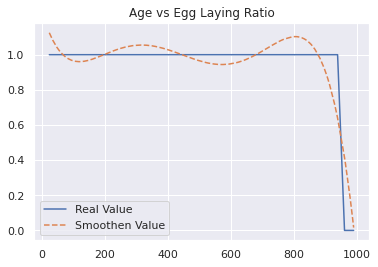

In [0]:
plot_ratio(df_age, 'Age')

In [0]:
df_age.GallusBreed.unique()

array(['Ameraucana', 'Marans'], dtype=object)

In [0]:
df_age[df_age.GallusBreed == 'Marans'].shape

(159, 5)

In [0]:
df_age[df_age.GallusBreed == 'Ameraucana'].shape

(11, 5)

It seems that Ameraucana Breed data is going to bias due to small number of data we have, but lets take a look first


In [0]:
def side_plot(df, columns, values=[], side=[], x='X', y='Y', lim=[-0.1, 1.1]):
  plt.figure(figsize=(15, 5))
  for i, value in enumerate(values):
    plt.subplot(1, 2, i+1)
    plt.plot(df[df[columns] == value][side[0]], df[df[columns] == value][side[1]])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(value)
    plt.ylim(lim[0], lim[1])
  plt.suptitle(f'{x} vs {y}')
  return plt.show()

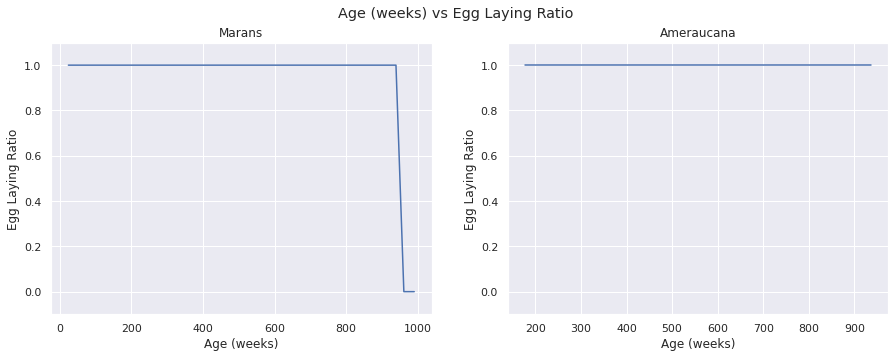

In [0]:
side_plot(df_age, 'GallusBreed', ['Marans', 'Ameraucana'], ['Age', 'EggLayingRatio'], x='Age (weeks)', y='Egg Laying Ratio')

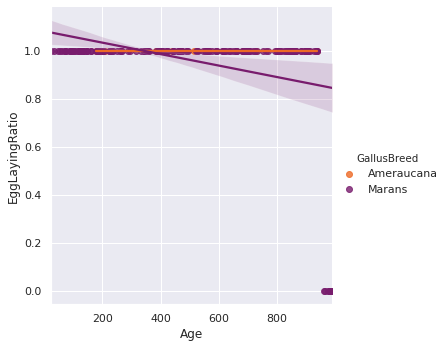

In [0]:
sns.lmplot(x="Age", y="EggLayingRatio", hue="GallusBreed", data=df_age, palette = 'inferno_r', height = 5)

It's clear and make sense that older the chicken less eggs it can produce. Lets inspect how Sun Light Exposure affect the Egg Laying Ratio


In [0]:
df_sun = df.groupby(['GallusBreed', 'SunLightExposure']).agg({
    'EggsPerDay':'sum',
    'GallusID':'count'
}).reset_index().sort_values(by='SunLightExposure')
df_sun.head()

,GallusBreed,SunLightExposure,EggsPerDay,GallusID
0,Ameraucana,5,10,10
1,Ameraucana,6,40,40
2,Ameraucana,7,25,25
4,Marans,7,215,230
5,Marans,8,260,265


In [0]:
df_sun['EggLayingRatio'] = df_sun['EggsPerDay'] / df_sun['GallusID']
df_sun.head()

,GallusBreed,SunLightExposure,EggsPerDay,GallusID,EggLayingRatio
0,Ameraucana,5,10,10,1.000000
1,Ameraucana,6,40,40,1.000000
2,Ameraucana,7,25,25,1.000000
4,Marans,7,215,230,0.934783
5,Marans,8,260,265,0.981132


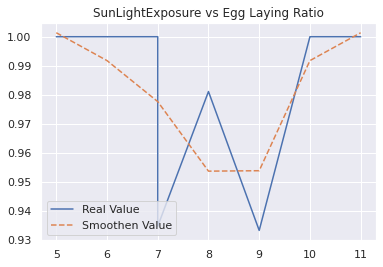

In [0]:
plot_ratio(df_sun, 'SunLightExposure')

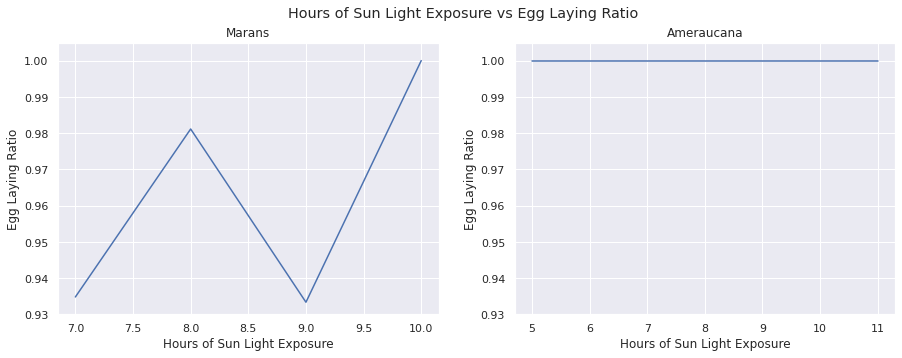

In [0]:
side_plot(df_sun, 'GallusBreed', ['Marans', 'Ameraucana'], ['SunLightExposure', 'EggLayingRatio'],
          x='Hours of Sun Light Exposure', y='Egg Laying Ratio', lim =[0.93, 1.005])

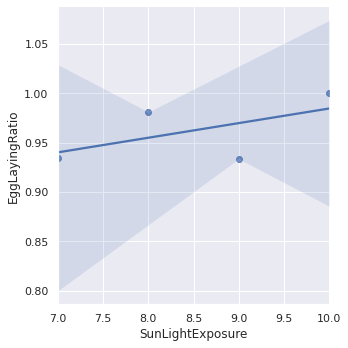

In [0]:
sns.lmplot(x="SunLightExposure", y="EggLayingRatio", data=df_sun[df_sun.GallusBreed=='Marans'], height = 5)

Its a bit clear that Ameraucana data is bias to all data we have, maybe consider to remove Ameraucana later.
But now lets take a look at columns that has contradictive correlation value

In [0]:
df_feed = df.groupby(['GallusBreed', 'AmountOfFeed']).agg({
    'EggsPerDay':'sum',
    'GallusID':'count'
}).reset_index()
df_feed['EggLayingRatio'] = df_feed['EggsPerDay'] / df_feed['GallusID']
df_feed.sample(5)

,GallusBreed,AmountOfFeed,EggsPerDay,GallusID,EggLayingRatio
17,Marans,113,35,35,1.0
1,Ameraucana,105,10,10,1.0
6,Ameraucana,114,10,10,1.0
7,Ameraucana,116,10,10,1.0
12,Marans,108,50,50,1.0


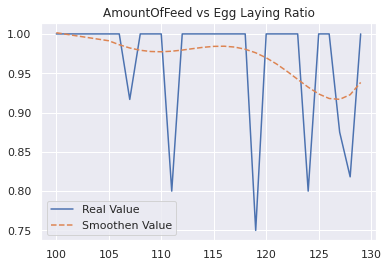

In [0]:
plot_ratio(df_feed, 'AmountOfFeed')

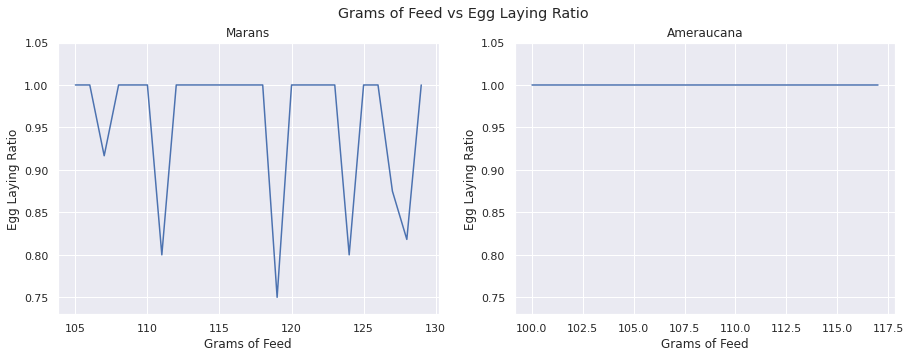

In [0]:
side_plot(df_feed, 'GallusBreed', ['Marans', 'Ameraucana'], ['AmountOfFeed', 'EggLayingRatio'],
          x='Grams of Feed', y='Egg Laying Ratio', lim =[0.73, 1.05])

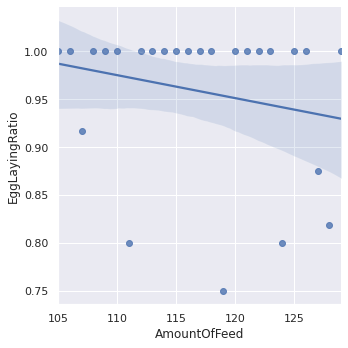

In [0]:
sns.lmplot(x="AmountOfFeed", y="EggLayingRatio", data=df_feed[df_feed.GallusBreed=='Marans'], height = 5)

In [0]:
df_weight = df.groupby(['GallusBreed', 'GallusWeight']).agg({
    'EggsPerDay':'sum',
    'GallusID':'count'
}).reset_index()
df_weight['EggLayingRatio'] = df_weight['EggsPerDay'] / df_weight['GallusID']
df_weight.sample(5)

,GallusBreed,GallusWeight,EggsPerDay,GallusID,EggLayingRatio
21,Marans,1650,20,20,1.0
31,Marans,1800,5,5,1.0
59,Marans,2190,10,10,1.0
56,Marans,2160,10,10,1.0
103,Marans,2910,5,5,1.0


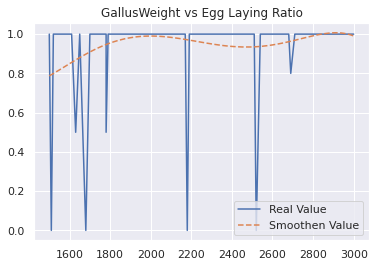

In [0]:
plot_ratio(df_weight, 'GallusWeight', 'lower right')

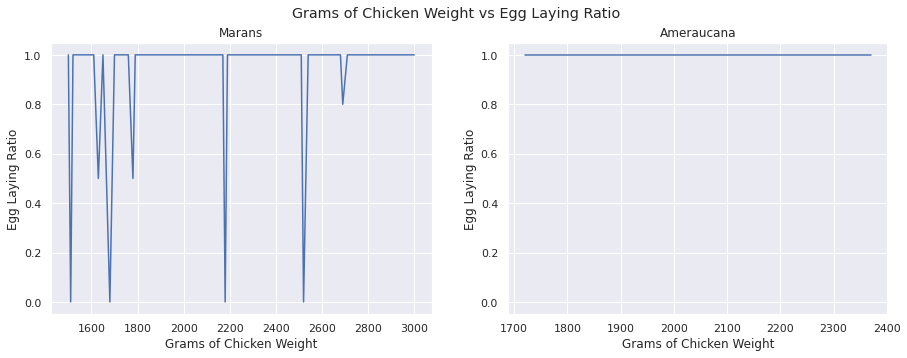

In [0]:
side_plot(df_weight, 'GallusBreed', ['Marans', 'Ameraucana'], ['GallusWeight', 'EggLayingRatio'],
          x='Grams of Chicken Weight', y='Egg Laying Ratio', lim =[-0.05, 1.05])

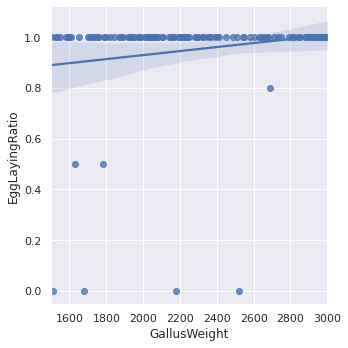

In [0]:
sns.lmplot(x="GallusWeight", y="EggLayingRatio", data=df_weight[df_weight.GallusBreed=='Marans'], palette = 'inferno_r', height = 5)

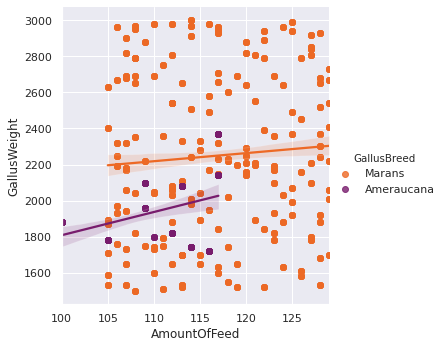

In [0]:
sns.lmplot(x="AmountOfFeed", y="GallusWeight", hue='GallusBreed', data=df, palette = 'inferno_r', height = 5)

It seems that AmountOfFeed columns is adding noise to our dataset because it doesn't make sense that bigger it's value cause the EggLayingRatio decreased, while GallusWeight is increased the ratio.
Another noise is Ameraucana breed due to very small data, which only contain 15 rows

So I conclude there are 3 columns which affect the EggLayingRatio, they are Age, GallusWeight and SunLightExposure

# Data Cleaning

First we check for duplicates


In [0]:
df_cleaned = df.drop('Day', axis=1).drop_duplicates()

In [0]:
print(f"Reduced from {df.shape[0]} rows, to {df_cleaned.shape[0]} rows")
print(f"Reduced from {df.shape[1]} columns, to {df_cleaned.shape[1]} columns")

Reduced from 1000 rows, to 190 rows
Reduced from 16 columns, to 15 columns


In [0]:
df_cleaned.isna().sum()

GallusID                  0
GallusBreed               0
Age                       0
GallusWeight              0
GallusEggColor            0
GallusEggWeight           0
AmountOfFeed              0
EggsPerDay                0
GallusCombType            0
SunLightExposure          0
GallusClass              11
GallusLegShanksColor      3
GallusBeakColor           3
GallusEarLobesColor     181
GallusPlumage             0
dtype: int64

In [0]:
df_cleaned = df_cleaned.drop(['GallusEggColor', 'GallusEggWeight', 'AmountOfFeed', 'GallusCombType',
                              'GallusLegShanksColor', 'GallusBeakColor', 'GallusEarLobesColor', 'GallusPlumage'], axis=1)
df_cleaned.columns

Index(['GallusID', 'GallusBreed', 'Age', 'GallusWeight', 'EggsPerDay',
       'SunLightExposure', 'GallusClass'],
      dtype='object')

In [0]:
df_cleaned = df_cleaned[df_cleaned.GallusBreed != 'Ameraucana']

In [0]:
print(f"Reduced from {df.shape[0]} rows, to {df_cleaned.shape[0]} rows")
print(f"Reduced from {df.shape[1]} columns, to {df_cleaned.shape[1]} columns")

Reduced from 1000 rows, to 179 rows
Reduced from 16 columns, to 7 columns


In [0]:
df_cleaned.isna().sum()

GallusID            0
GallusBreed         0
Age                 0
GallusWeight        0
EggsPerDay          0
SunLightExposure    0
GallusClass         0
dtype: int64

In [0]:
df_cleaned.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,179.0,522.346369,287.954004,24.0,256.0,554.0,799.5,990.0
GallusWeight,179.0,2249.106145,449.334445,1500.0,1880.0,2210.0,2665.0,3000.0
EggsPerDay,179.0,0.960894,0.194391,0.0,1.0,1.0,1.0,1.0
SunLightExposure,179.0,8.385475,1.071600,7.0,7.0,8.0,9.0,10.0


In [0]:
df_corr = df_cleaned.groupby(['Age', 'GallusWeight', 'SunLightExposure']).agg({
    'GallusBreed':'count',
    'EggsPerDay':'sum'
}).reset_index()
df_corr['EggLayingRatio'] = df_corr['EggsPerDay'] / df_corr['GallusBreed']
df_corr.sort_values(by='EggLayingRatio')
df_corr.sample(5)

,Age,GallusWeight,SunLightExposure,GallusBreed,EggsPerDay,EggLayingRatio
162,902,2210,8,1,1,1.0
170,936,1530,7,1,1,1.0
166,908,1730,10,1,1,1.0
15,102,2320,8,1,1,1.0
155,866,2170,9,1,1,1.0


In [0]:
X = df_corr.drop(['EggLayingRatio', 'EggsPerDay'], axis=1)
Y = df_corr.pop('EggLayingRatio')

In [0]:
Y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
174    0.0
175    0.0
176    0.0
177    0.0
178    0.0
Name: EggLayingRatio, Length: 179, dtype: float64

In [0]:
X.head()

,Age,GallusWeight,SunLightExposure,GallusBreed
0,24,1880,8,1
1,35,2170,7,1
2,48,1880,9,1
3,55,2190,9,1
4,61,2540,7,1


In [0]:
from sklearn.preprocessing import MinMaxScaler as mms

scaler = mms()
X_scaled = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)
X_scaled.head()

,Age,GallusWeight,SunLightExposure,GallusBreed
0,0.000000,0.253333,0.333333,0.0
1,0.011387,0.446667,0.000000,0.0
2,0.024845,0.253333,0.666667,0.0
3,0.032091,0.460000,0.666667,0.0
4,0.038302,0.693333,0.000000,0.0


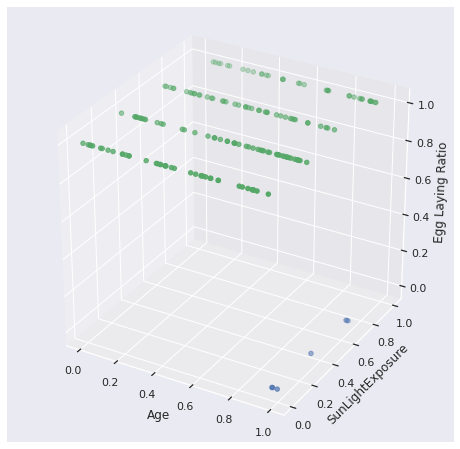

In [0]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection="3d")

x, y = 'Age', 'SunLightExposure' #'GallusWeight'
color = np.array(['g' if val == 1.0 else 'b' for val in Y])

z_points = Y
x_points = X_scaled[x]
y_points = X_scaled[y]
ax.scatter3D(x_points, y_points, z_points, c=color)

ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel('Egg Laying Ratio')

plt.show()